In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import seaborn as sns
import matplotlib.pylab as plt

#sns.set_style('whitegrid')
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import date, timedelta
today = date.today()

def fill_missing_values(df_data):
    df_data.fillna(method='ffill', inplace=True)
    df_data.fillna(method='bfill', inplace=True)

In [4]:
from zipline.api import *
import logbook
log = logbook.Logger('algo')

## Ingesting Data

In [5]:
%load_ext zipline

In [6]:
!CSVDIR=./data/csv/ndx/ zipline ingest -b csvdir --no-show-progress

[2023-03-01T14:51:10+0100-INFO][zipline.data.bundles.core]
 Ingesting csvdir
[2023-03-01T14:51:11+0100-INFO][root]
 creating /Users/maximilian/.zipline/data/csvdir/2023-03-01T13;51;10.230562/daily_equities.bcolz
[2023-03-01T14:51:11+0100-INFO][root]
 copying /var/folders/kh/4158h03d0f93fssk6420vdlh0000gn/T/tmpawgkb7s8/csvdir/2023-03-01T13;51;10.230562/daily_equities.bcolz/__attrs__ -> /Users/maximilian/.zipline/data/csvdir/2023-03-01T13;51;10.230562/daily_equities.bcolz
[2023-03-01T14:51:11+0100-INFO][root]
 creating /Users/maximilian/.zipline/data/csvdir/2023-03-01T13;51;10.230562/daily_equities.bcolz/high
[2023-03-01T14:51:11+0100-INFO][root]
 copying /var/folders/kh/4158h03d0f93fssk6420vdlh0000gn/T/tmpawgkb7s8/csvdir/2023-03-01T13;51;10.230562/daily_equities.bcolz/high/__attrs__ -> /Users/maximilian/.zipline/data/csvdir/2023-03-01T13;51;10.230562/daily_equities.bcolz/high
[2023-03-01T14:51:11+0100-INFO][root]
 creating /Users/maximilian/.zipline/data/csvdir/2023-03-01T13;51;10.23056

In [7]:
#!zipline bundles
!zipline clean -b csvdir --keep-last 1

[2023-03-01T14:51:13+0100-INFO][zipline.data.bundles.core]
 Cleaning 2023-02-25T19;40;37.656600.


### Working with Zipline Data

In [8]:
%%zipline --start 2015-12-31 --end 2023-1-4 --bundle csvdir --no-benchmark
import zipline
from zipline.api import order_target, record, symbol
from pathlib import Path
import pandas as pd
tickers = pd.read_csv("data/tickers/nasdaq_tickers.csv", index_col=[0])
stocks = tickers.ticker
import pandas_datareader.data as web
start = pd.Timestamp('31-12-2015')
end = pd.Timestamp('23-12-2022')
sp500 = web.DataReader('SP500', 'fred', start, end).SP500
benchmark_returns = sp500.pct_change()

def initialize(context):
    context.i = 0
    context.assets = [symbol(sym) for sym in stocks]
    context.benchmark_returns = benchmark_returns
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('data/zipline_data/stock_data.csv', index=False)
    else:
        df.to_csv('data/zipline_data/stock_data.csv', index=False, mode='a', header=None)
    context.i += 1

,period_open,period_close,net_leverage,starting_exposure,returns,ending_exposure,starting_value,ending_value,starting_cash,ending_cash,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility,benchmark_period_return,benchmark_volatility
2015-12-31 21:00:00+00:00,2015-12-31 14:31:00+00:00,2015-12-31 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,1,2015-12,NaN,0.000000,NaN
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,2,2016-01,0.0,-0.015304,0.171784
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,3,2016-01,0.0,-0.013322,0.150334
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,4,2016-01,0.0,-0.026263,0.140779
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,5,2016-01,0.0,-0.049341,0.172044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 21:00:00+00:00,2022-12-28 14:31:00+00:00,2022-12-28 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,1761,2022-12,0.0,0.881083,0.192814
2022-12-29 21:00:00+00:00,2022-12-29 14:31:00+00:00,2022-12-29 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,1762,2022-12,0.0,0.881083,0.192759
2022-12-30 21:00:00+00:00,2022-12-30 14:31:00+00:00,2022-12-30 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,1763,2022-12,0.0,0.881083,0.192704
2023-01-03 21:00:00+00:00,2023-01-03 14:31:00+00:00,2023-01-03 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,None,0.0,0.0,0.0,0.0,1764,2023-01,0.0,0.881083,0.192650


asset
Equity(0 [AAPL])     Axes(0.125,0.2;0.775x0.68)
Equity(1 [ABNB])     Axes(0.125,0.2;0.775x0.68)
Equity(10 [AMGN])    Axes(0.125,0.2;0.775x0.68)
Equity(100 [ZS])     Axes(0.125,0.2;0.775x0.68)
Equity(11 [AMZN])    Axes(0.125,0.2;0.775x0.68)
                                ...            
Equity(95 [WBA])     Axes(0.125,0.2;0.775x0.68)
Equity(96 [WBD])     Axes(0.125,0.2;0.775x0.68)
Equity(97 [WDAY])    Axes(0.125,0.2;0.775x0.68)
Equity(98 [XEL])     Axes(0.125,0.2;0.775x0.68)
Equity(99 [ZM])      Axes(0.125,0.2;0.775x0.68)
Name: price, Length: 101, dtype: object

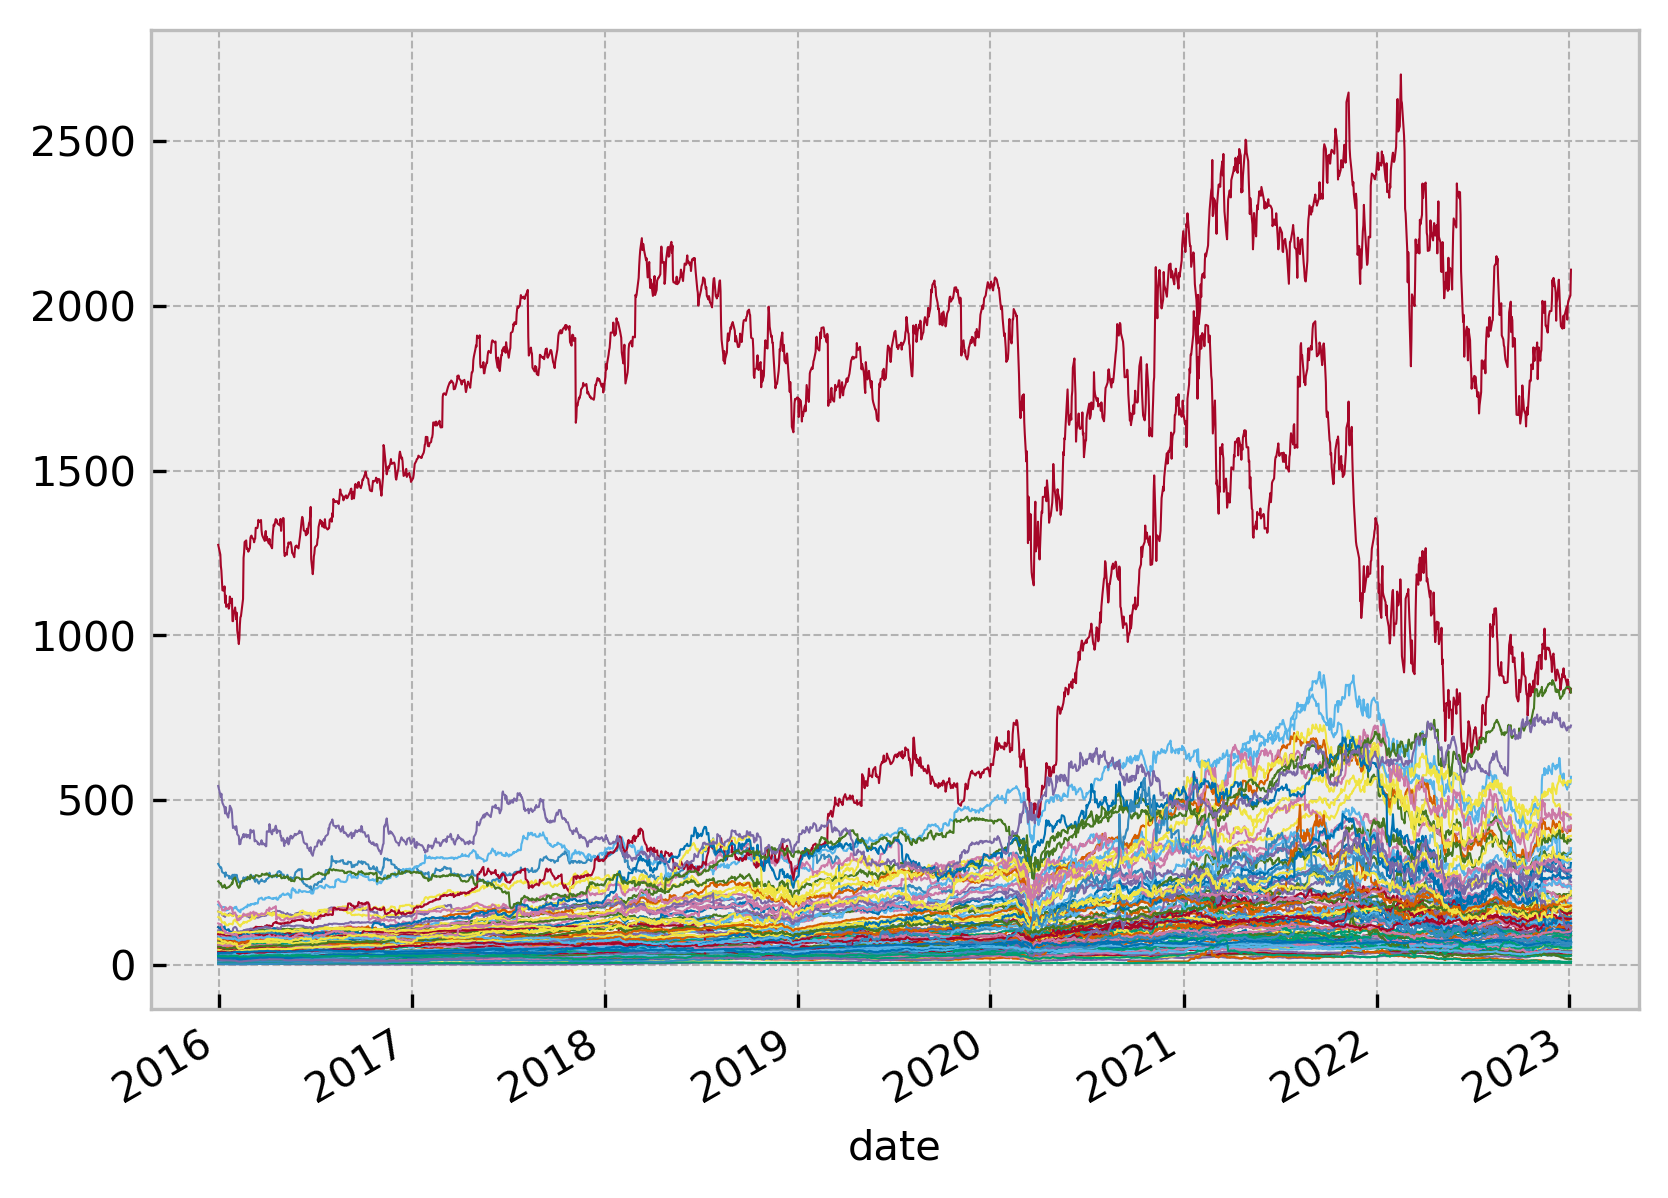

In [9]:
df = pd.read_csv('data/zipline_data/stock_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index(df['date']).groupby('asset').price.plot(lw=0.5, legend=False)